## <center><font color=#154360>FEATURE ENGINEERING STEPS
 - Continuation to Data Cleaning

---
# **Table of Contents**
---

**1.** [**Installing & Importing Libraries**](#Section1)<br>
**2.** [**Loading Data**](#Section2)<br>
**3.** [**Data Acquisition & Description**](./DataCleaning.ipynb)<br>
**4.** [**Data Pre-Processing**](./DataCleaning.ipynb)<br>
**5.** [**Find Missing Values Mean to know Percentage**](#Section5)<br>

**6.** [**Feature Engineering Steps**](#Section6)<br>
   - **6.1** [**Handling Missing Values -Univariate Approach**](#Section61)<br>
   - **6.2** [**Handling NaN Values for Categorical variable**](#Section62)
   - **6.3** [**Divide Data into X and Y***](#Section63)
   - **6.4** [**Split Dataset into Train and Validation**](#Section64)
   - **6.5** [**Continuous and Categorical Features split**](#Section65)
   - **6.6** [**Encoding**](#Section66)
   - **6.7** [**Feature Scaling***](#Section67)
   - **6.8** [**Concatenate train cat and train cont.**](#Section68)
   - **6.9** [**Concatenate categorical validation and continuous validation.**](#Section69)
   - **6.10** [**Filling Missing Values -Multivariate Approach-KNN**](#Section610)
   - **6.11** [**Prepare Dataset for EDA**](#Section611)
   - **6.12** [**Saving the Train and Validation Datasets**](#Section612)
   - **6.13** [**Saving Train(X,y) , Validation((X,y) Datasets for Model Building activity**](#Section613)

**7.** [**Test Data Pre-Processing and Post-Processing**](#Section7)<br>
   - **7.1** [**Load the Unseen Test Data**](#Section71)<br>
   - **7.2** [**Preprocessing Test Data**](#Section72)<br>
   - **7.3** [**Saving Test Data**](#Section73)<br>
   
**8.** [**Exploratory Data Analysis**](./EDA.ipynb)<br>
**9.** [**Summarization**](./EDA.ipynb)<br>

**10.**[**Model Development and Evaluation**](./Model_Building.ipynb)<br>

------------
<a name = Section1></a>
## **1. Importing Libraries**
-----------

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer



------------
<a name = Section1></a>
## **2. Loading Data**
------------

In [161]:
emp_merged = pd.read_csv("emp_merged.csv")

In [162]:
emp_merged.shape

(14116, 14)

  ---------------------------------
  <a name = Section5></a>
    
## **5. Find Missing Values Mean to know Percentage**

In [163]:
emp_merged.isnull().mean()

employee_id          0.000000
age                  0.000000
gender               0.000000
marital_status       0.000000
avg_monthly_hrs      0.000000
department           0.050014
filed_complaint      0.855412
last_evaluation      0.105341
n_projects           0.000000
recently_promoted    0.978960
salary               0.000000
satisfaction         0.010626
status               0.000000
tenure               0.010626
dtype: float64

---
**<font color=#196F3D>Observations**

- <i>**tenure**  and **satisfaction** columns have around **1% missing values** - **- KNN Imputation**
- <i>**department column** has approx. **5% missing values**                    - **- Arbitrary Cat. Value Imputation**
- <i>**last_evaluation column** has **10% missing values**                      - **- KNN Imputation**
- <i>**filed_complaint column** has approx. **85% missing values**              - **- Replace nan with 0.0** 
- <i>**recently_promoted column** has approx. **97% missing values**            - **- Replace nan with 0.0**

### **Visualize Target Feature Distribution**

<AxesSubplot:xlabel='status', ylabel='count'>

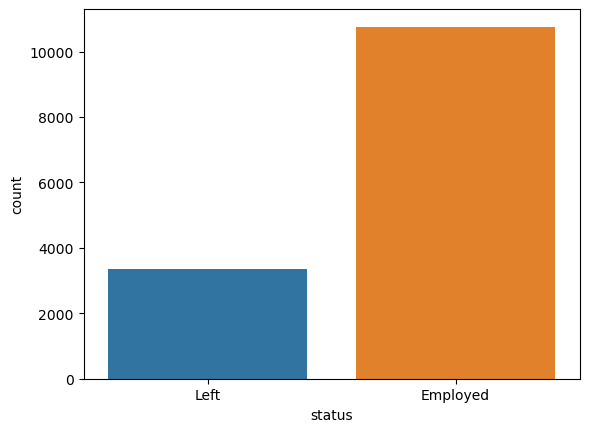

In [164]:
sns.countplot(data=emp_merged, x='status')

---
**<font color=#196F3D>Observations**

- **Imbalanced Class-Left**
- Will Treat later, if model could not fit well

### **Heat Map to find Correlation**

<AxesSubplot:>

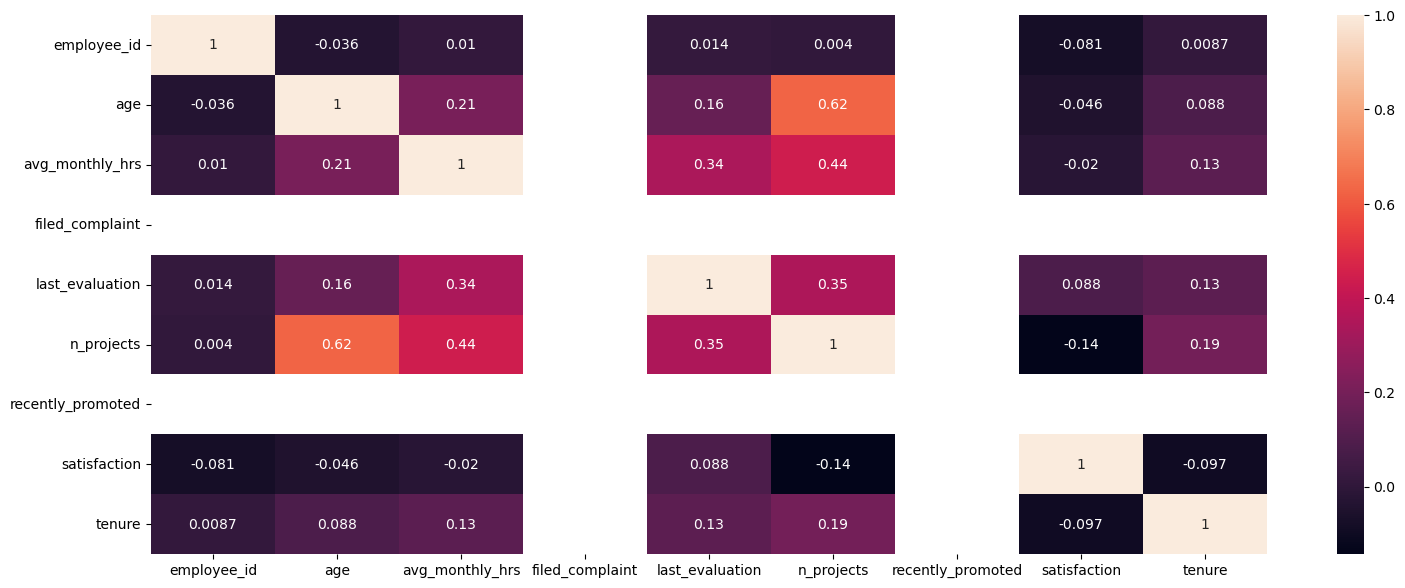

In [165]:
paper = plt.figure(figsize = [18,7])
sns.heatmap(emp_merged.corr(), annot = True)

---
**<font color=#196F3D>Observations**

- **Age has correlation with n_projects**
- **Remove this feature to handle Multicollinearity**

--------------
### <center> Creating a Copy of Loaded Dataset 

In [166]:
emp2_copy=emp_merged.copy(deep=True)

In [167]:
emp2_copy.shape

(14116, 14)

- ### Excluding Age, Gender , marital_status from the dataset

In [168]:
emp_copy2=emp2_copy.loc[:,['employee_id','avg_monthly_hrs','department','filed_complaint','last_evaluation','n_projects','recently_promoted','salary','satisfaction','tenure','status']]

In [169]:
emp_copy2.isnull().mean()

employee_id          0.000000
avg_monthly_hrs      0.000000
department           0.050014
filed_complaint      0.855412
last_evaluation      0.105341
n_projects           0.000000
recently_promoted    0.978960
salary               0.000000
satisfaction         0.010626
tenure               0.010626
status               0.000000
dtype: float64

 <a name = Section6></a>
# **6.Feature Engineering Steps**

 <a name = Section61></a>
### **6.1 Handling Missing Values -Univariate Approach**
- Filling Missing Values for **department** 
- Univariate Arbitrary Approach for Categorical variable
- Replacing NaN with string 'missing'. 

In [170]:
emp_copy2['department'].replace(np.nan,'missing', inplace=True)

<a name = Section62></a>
### **6.2 Handling NaN Values**
- Filling Missing Values for **filed_complaint and recently_prmoted**
- Replacing NaN with 0

In [172]:
emp_copy2['filed_complaint'].replace(np.nan,0, inplace=True)


In [173]:
emp_copy2['recently_promoted'].replace(np.nan,0, inplace=True)

In [174]:
emp_copy2.columns

Index(['employee_id', 'avg_monthly_hrs', 'department', 'filed_complaint',
       'last_evaluation', 'n_projects', 'recently_promoted', 'salary',
       'satisfaction', 'tenure', 'status'],
      dtype='object')

In [175]:
# No Null Values for Department
emp_copy2.department.isnull().sum()

0

<a name = Section63></a>
### **6.3 Divide Data into X and Y**

In [176]:
X = emp_copy2.drop('status',axis = 1)
Y = emp_copy2['status'].copy()

In [177]:
# X.head()

In [178]:
# Y.head()

In [179]:
# X.columns


<a name = Section64></a>
### **6.4 Split Dataset into Train and Validation**


In [181]:

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20, random_state=50, stratify=Y)


<a name = Section65></a>
### **6.5. Continuous and Categorical Features split**

In [182]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cont = X_train.select_dtypes(exclude=['object'])

In [183]:
X_valid_cat = X_valid.select_dtypes(include=['object'])
X_valid_cont = X_valid.select_dtypes(exclude=['object'])

In [184]:
X_valid_cat.isnull().sum()

department    0
salary        0
dtype: int64


<a name = Section66></a>
### **6.6. Encoding**


- **Function Definition to fit train data for One Hot Encoding**

In [185]:

def ohe_fit(df):
    enc = OneHotEncoder(drop='first', sparse = False)
    enc.fit(df)
    print(enc.categories_)
    return enc


- **Fitting Train Data**

In [186]:

enc_X=ohe_fit(X_train_cat)


[array(['D00-AD', 'D00-ENG', 'D00-FN', 'D00-IT', 'D00-MN', 'D00-MT',
       'D00-PD', 'D00-PR', 'D00-SP', 'D00-SS', 'D00-TP', 'missing'],
      dtype=object), array(['high', 'low', 'medium'], dtype=object)]


- **Replacing Employed with 0 and Left with 1 in Target Feature(Y_train and Y_valid)**

In [187]:
y_train.head()

11415    Employed
3501     Employed
10337    Employed
231          Left
13226    Employed
Name: status, dtype: object

In [188]:

y_train.replace('Employed',0 ,inplace=True)
y_train.replace('Left',1 ,inplace=True)

In [189]:
y_valid.replace('Employed',0 ,inplace=True)
y_valid.replace('Left',1 ,inplace=True)

In [190]:
y_train

11415    0
3501     0
10337    0
231      1
13226    0
        ..
11825    0
9420     0
10448    0
12563    0
8323     0
Name: status, Length: 11292, dtype: int64

- **Function Defintion to transform train and test for One Hot Encoding**

In [191]:
def get_ohe(df, enc):
    temp_df = pd.DataFrame(enc.transform(df), columns = enc.get_feature_names_out(X_train_cat.columns), index = df.index)
#     temp_df.drop(columns=df.columns, axis=1, inplace=True)
#     df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return temp_df

- **Calling Funcion on train and test to transform**

In [192]:
X_train_ohe = get_ohe(X_train_cat, enc_X)
X_valid_ohe = get_ohe(X_valid_cat, enc_X)

-------------------------------------
### <center>KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. 

<a name = Section67></a>
### **6.7 Feature Scaling**

- **Creating Scaler Object**

In [193]:
scaler = MinMaxScaler()

- **Fitting Train Data to Scale**

In [194]:
scaler.fit(X_train_cont)

MinMaxScaler()

- **Transforming Train and Test Data to Scale**

In [195]:
X_train_s = pd.DataFrame(scaler.transform(X_train_cont), columns = X_train_cont.columns, index = X_train_cont.index)
X_valid_s = pd.DataFrame(scaler.transform(X_valid_cont), columns = X_train_cont.columns, index = X_valid_cont.index)

In [196]:
# X_valid_s.head()

  <a name = Section68></a>
### 6.8 Concatenate train cat and train cont.


In [197]:
X_train_comb = pd.concat([X_train_ohe,X_train_s], axis=1)


In [198]:
X_train_comb.isnull().sum()

department_D00-ENG       0
department_D00-FN        0
department_D00-IT        0
department_D00-MN        0
department_D00-MT        0
department_D00-PD        0
department_D00-PR        0
department_D00-SP        0
department_D00-SS        0
department_D00-TP        0
department_missing       0
salary_low               0
salary_medium            0
employee_id              0
avg_monthly_hrs          0
filed_complaint          0
last_evaluation       1188
n_projects               0
recently_promoted        0
satisfaction           126
tenure                 126
dtype: int64

In [199]:
# X_train_comb.head()


  <a name = Section69></a>
### 6.9 Concatenate categorical validation  and continuous test.

In [200]:
X_valid_comb = pd.concat([X_valid_ohe,X_valid_s], axis=1)


In [201]:
# X_valid_comb.head()


  <a name = Section610></a>
### 6.10 Filling Missing Values

- **Using KNN Imputer for Filling last_evaluation, satisfaction and tenure**

- **Creating Imputer Object**
- **Fitting Train Data to Imputer**

In [202]:

imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train_comb)


KNNImputer()

- **Tranforming Train and Validation Data to Imputer**

In [203]:
X_train_df = pd.DataFrame(imputer.transform(X_train_comb),columns = X_train_comb.columns, index=X_train_comb.index)

In [204]:
X_valid_df = pd.DataFrame(imputer.transform(X_valid_comb),columns = X_train_comb.columns, index=X_valid_comb.index)

In [205]:
X_train_df.columns

Index(['department_D00-ENG', 'department_D00-FN', 'department_D00-IT',
       'department_D00-MN', 'department_D00-MT', 'department_D00-PD',
       'department_D00-PR', 'department_D00-SP', 'department_D00-SS',
       'department_D00-TP', 'department_missing', 'salary_low',
       'salary_medium', 'employee_id', 'avg_monthly_hrs', 'filed_complaint',
       'last_evaluation', 'n_projects', 'recently_promoted', 'satisfaction',
       'tenure'],
      dtype='object')

  <a name = Section611></a>
### 6.11 Prepare Dataset for EDA

- 1.age, gender, marital_status were previously dropped from the copiedDataframe. Retrieve from the original dataset
- 2.department is a categorical feature. Obtain before Encoding with no missing values
- 3.continuous features with all values filled in- use inverse_tranform function to revert continous features to original values
- Combine 1 ,2 and 3 

- Save New Datframe  CSV files


In [206]:
train_conti=pd.DataFrame()
train_conti=X_train_df.loc[:,['employee_id', 'avg_monthly_hrs','filed_complaint', 'last_evaluation','n_projects','recently_promoted','satisfaction', 'tenure']]

In [207]:
# train_conti.isnull().sum()

- **Inverse Transform continuous features to get original state**

In [208]:
train_conti_inv=pd.DataFrame(scaler.inverse_transform(train_conti), columns = X_train_cont.columns, index = train_conti.index)

In [209]:
# Retieving index of Unscaled continous features (Treated for Missing Values)
train_conti_inv.index
# Categoricalfeatures and Age feature(Before treating for encoding)
df0=emp2_copy.iloc[lambda x: train_conti_inv.index,[1,2,3,10,12]]
# Feature Department (After Missing Value Treatment)
df1=emp_copy2.iloc[lambda x: train_conti_inv.index,[2]]

- **Concatenate the obtained three datasets**

In [210]:
emp_train=pd.concat([train_conti_inv, df0, df1], axis=1)

In [211]:
emp_train.isnull().sum()

employee_id          0
avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
satisfaction         0
tenure               0
age                  0
gender               0
marital_status       0
salary               0
status               0
department           0
dtype: int64

- **Verifying Dataframe Shape**

In [212]:
emp_train.shape

(11292, 14)

  <a name = Section612></a>
### 6.12Saving Train dataset to csv for EDA

In [213]:
emp_train.to_csv('processed_train\emp_train.csv', index=False)

  <a name = Section613></a>
### 6.13.Saving Train(X,y) , Validation((X,y) Datasets for Model Building activity

In [214]:
X_train_df.to_csv('train_test\X_train.csv', index=False)

In [215]:
X_valid_df.to_csv('train_test\X_valid.csv', index=False)

In [216]:
y_train.to_csv('train_test\y_train.csv', index=False)

In [217]:
y_valid.to_csv('train_test\y_valid.csv', index=False)

In [218]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292 entries, 11415 to 8323
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   department_D00-ENG  11292 non-null  float64
 1   department_D00-FN   11292 non-null  float64
 2   department_D00-IT   11292 non-null  float64
 3   department_D00-MN   11292 non-null  float64
 4   department_D00-MT   11292 non-null  float64
 5   department_D00-PD   11292 non-null  float64
 6   department_D00-PR   11292 non-null  float64
 7   department_D00-SP   11292 non-null  float64
 8   department_D00-SS   11292 non-null  float64
 9   department_D00-TP   11292 non-null  float64
 10  department_missing  11292 non-null  float64
 11  salary_low          11292 non-null  float64
 12  salary_medium       11292 non-null  float64
 13  employee_id         11292 non-null  float64
 14  avg_monthly_hrs     11292 non-null  float64
 15  filed_complaint     11292 non-null  float64
 16  l

-------------
-------------
<a name = Section7></a>
## 7. Test Data Preprocessing and PostProcessing Steps
-----------

  <a name = Section71></a>
### 7.1Load the Unseen Test Data

In [219]:
test_df = pd.read_csv("unseen_data.csv")

In [220]:
test_df.shape

(100, 10)

In [221]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


<a name = Section72></a>
### 7.2Preprocessing Test Data

- **No Duplicate Values**

In [222]:
test_df['employee_id'].isnull().sum()

0

In [223]:
test_df['department'].value_counts()

D00-SS     27
D00-ENG    17
D00-SP     13
D00-IT      9
D00-PD      7
D00-MT      7
D00-FN      6
D00-MN      5
D00-TP      3
-IT         2
D00-PR      1
D00-AD      1
Name: department, dtype: int64

 **Removing Inconsistency**

  - Replace - IT with D00-IT

In [224]:
test_df['department'].replace('-IT','D00-IT', inplace=True)

In [225]:
test_df['department'].replace(np.nan,'missing', inplace=True)
test_df['filed_complaint'].replace(np.nan,0, inplace=True)
test_df['recently_promoted'].replace(np.nan,0, inplace=True)

In [226]:
test_data=test_df.loc[:,['employee_id','avg_monthly_hrs','department','filed_complaint','last_evaluation','n_projects','recently_promoted','salary','satisfaction','tenure']]

In [227]:
#  Cont and Cat split
# ----------------------
X_test_cat = test_data.select_dtypes(include=['object'])
X_test_cont = test_data.select_dtypes(exclude=['object'])

In [228]:
X_test_cat.columns

Index(['department', 'salary'], dtype='object')

In [230]:
# Encoding and Scaling
# ---------------------
X_test_ohe = pd.DataFrame(enc_X.transform(X_test_cat), columns = enc_X.get_feature_names_out(X_train_cat.columns), index = X_test_cat.index)
X_test_s = pd.DataFrame(scaler.transform(X_test_cont), columns = X_test_cont.columns, index = X_test_cont.index)


In [231]:
# Concatenate test cat and test cont
# ----------------------------------=
X_test_comb = pd.concat([X_test_ohe,X_test_s], axis=1)

In [232]:
# Imputing using KNN for satisfaction, tenure and last_evaluation
# ----------------------------------------
X_test_combfill = pd.DataFrame(imputer.transform(X_test_comb),columns = X_train_comb.columns, index=X_test_comb.index)

In [233]:
X_test_combfill.isnull().sum()

department_D00-ENG    0
department_D00-FN     0
department_D00-IT     0
department_D00-MN     0
department_D00-MT     0
department_D00-PD     0
department_D00-PR     0
department_D00-SP     0
department_D00-SS     0
department_D00-TP     0
department_missing    0
salary_low            0
salary_medium         0
employee_id           0
avg_monthly_hrs       0
filed_complaint       0
last_evaluation       0
n_projects            0
recently_promoted     0
satisfaction          0
tenure                0
dtype: int64

In [234]:
X_test_combfill.shape

(100, 21)

In [235]:
Xconti_inverseS=pd.DataFrame(scaler.inverse_transform(X_test_s), columns = X_train_cont.columns, index = X_test_cont.index)

In [236]:
X_test_combfill

,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,...,salary_low,salary_medium,employee_id,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.387506,0.325670,0.0,0.309881,0.166667,0.0,0.375445,0.125
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.247960,0.659004,0.0,0.684441,0.166667,0.0,0.749478,0.125
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.078201,0.409962,0.0,0.333817,0.166667,0.0,0.308768,0.125
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.119071,0.321839,0.0,0.682127,0.500000,0.0,0.825030,0.000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.065375,0.329502,0.0,0.201193,0.166667,0.0,0.292377,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.338843,0.812261,0.0,0.631080,0.500000,0.0,0.752690,0.125
96,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.129298,0.697318,1.0,0.507293,0.333333,0.0,0.646674,0.000
97,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.159306,0.432950,1.0,0.281347,0.500000,0.0,0.880767,0.125
98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.358398,0.613027,0.0,0.364236,0.333333,0.0,0.584857,0.125


<a name = Section73></a>
### 7.3 Saving Test Data

In [237]:
X_test_combfill.to_csv('unseen\X_test.csv', index=False)

In [238]:
Xconti_inverseS['employee_id'].to_csv('unseen\employee_id.csv', index=False)